<a href="https://www.kaggle.com/code/rohitgadhwar/address-overfitting-regularization?scriptVersionId=110047635" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
def create_non_linear_data(n, func):
    X = np.linspace(0,1, n)
    
    # obtain y = non_linear_function + noise
    y = func(X) + np.random.normal(scale=0.2, size=X.shape)
    return X, y

def sin2pix(x):
    # y = sin(2*pi*x)
    return np.sin(2*np.pi*x)

def visualize_model_fit(X, y, model, degree, func=sin2pix,):
    '''plot trained model along with the data generation funct'''
    points = np.linspace(0,1,100)
    output = func(points)
    
    if degree > 0:
        plt.scatter(X, y, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(points, output, c="g", label="$\sin(2\pi x)$", linestyle='dashed')
        
        poly = PolynomialFeatures(degree=degree)
        y_hat = model.predict(poly.fit_transform(points.reshape(-1,1)))
        plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$")
        plt.xlabel("$x_1$")
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}".format(degree))

In [3]:
X, y = create_non_linear_data(10, sin2pix)
poly = PolynomialFeatures(degree=9)
X_transform = poly.fit_transform(X.reshape(-1,1))

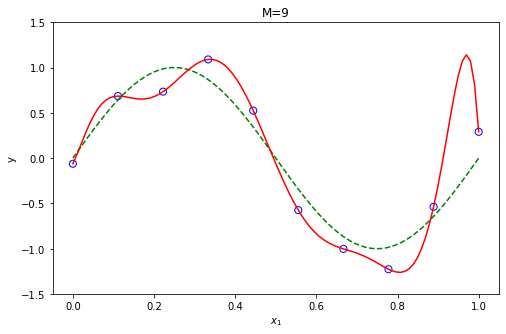

In [4]:
lr = LinearRegression()
lr.fit(X_transform, y)

f = plt.figure(figsize=(8,5))
visualize_model_fit(X, y, lr, degree=9)

**Model is Clearly Overfitting with the data points**

# **How to address overﬁtting?**
* Using **larger training sets**
* Controlling model complexity through **regularization**, which allows us to fit complex model on relatively smaller dataset without overfitting.

# **Fixing Overfitting with more data**
* Train a Polynomial model of degree 9 with two datasets
    1. with 10 points
    2. with 100 points

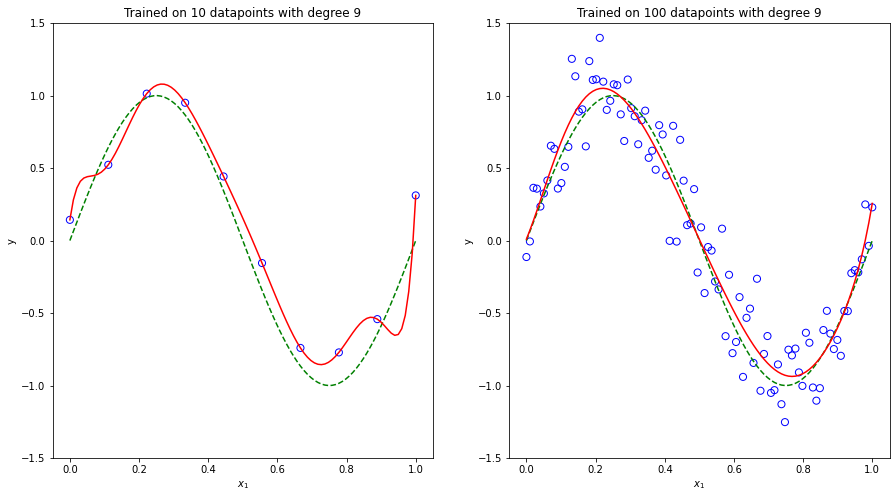

In [5]:
degree=9

f = plt.figure(figsize=(15,8))
for i, c in enumerate([10, 100], start=1):
    X, y = create_non_linear_data(c, sin2pix)
    poly = PolynomialFeatures(degree)
    X_transform = poly.fit_transform(X.reshape(-1,1))
    lr = LinearRegression()
    lr.fit(X_transform, y)
    
    plt.subplot(1,2,i)
    visualize_model_fit(X, y, lr, degree)
    plt.title('Trained on {} datapoints with degree 9'.format(c))

### **Second plot shows smoother fitness with more data**

# **Fixing Overfitting through Regularization** 
Overﬁtting is caused by larger weights assigned to the higher order polynomial terms.
<br>
**Regularization:** Add a penalty term in the loss function for such large weights to control this behaviour.
<br>
At a high level, let's modiﬁes loss function by adding a penalty term as follows:<br>
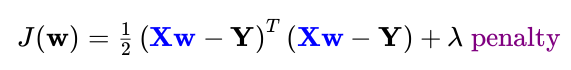<br>
### **Two components of regularization**
* **Penalty** is a function of weight vector
* **Regularization rate** λ controls amount of penalty to be added to the loss function.

### **Regularization types**
* L2 regularization (Ridge regression)
* L1 regularization (Lasso regression)
* Combination of L1 and L2: Elastic net regularization

## **Ridge Regression**
**Ridge regression** uses second norm of the weight vector as a penalty term:<br>
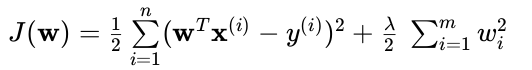 <br>
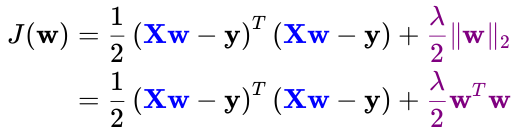
### **Gradient calculation**
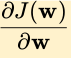 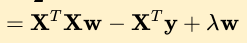
### **Normal Equation**
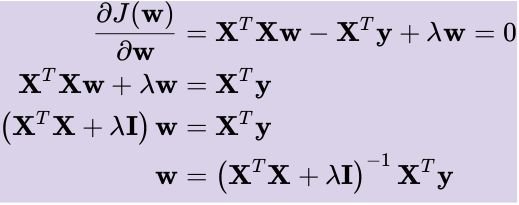
### **Gradient Descent Update Rule**
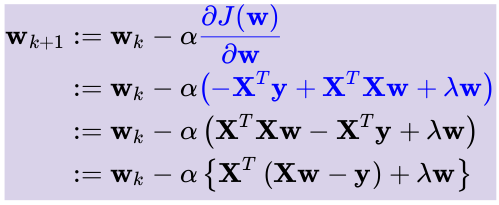

# **Implementation of Ridge Regression**

In [6]:
class Ridge(object):
    def __init__(self):
        self.w = None

    def predict(self, X:np.ndarray):
        y =  X @ self.w
        return y
    
    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate):
        e = y - self.predict(X)
        return (1/2)* (np.transpose(e)@e) + (reg_rate/2)*(np.transpose(self.w)@self.w)
    
    def fit(self, X:np.ndarray, y:np.ndarray, reg_rate:float):
        self.w = np.zeros((X.shape[1]))
        eye = np.eye(np.size(X,1))
        self.w = np.linalg.solve(
                        reg_rate * eye + X.T @ X,
                        X.T @ y)
        return self.w

In [7]:
X, y = create_non_linear_data(10, sin2pix)
poly = PolynomialFeatures(9)
X_transform = poly.fit_transform(X.reshape(-1,1))

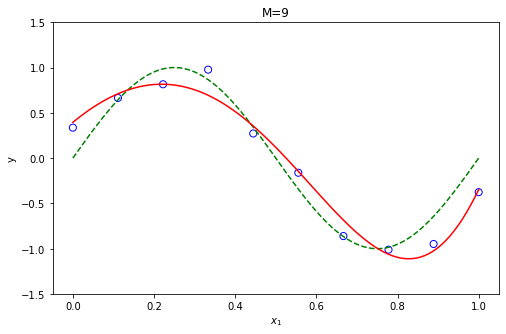

In [8]:
rr = Ridge()
rr.fit(X_transform, y, reg_rate=0.001)

f = plt.figure(figsize=(8,5))
visualize_model_fit(X, y, rr, degree)

**It is giving better result with smaller dataset**

## **Choosing regularization rate (λ)**
1. Construct a set of values of λ that we want to experiment with.
2. For each candidate value of λ:
    1. Train the model and calculate cross validation error on validation set.
    2. Choose the the value of λ which results in the least cross validation error.
3. With the chosen value of λ, train the model on entire training set.
4. Report the model performance on the test set.

In [9]:
from sklearn.metrics import mean_squared_error as mse
def plot_model_selection(training_errors):
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c='b', label='Training')
    plt.xlabel("reg rate (λ")
    plt.ylabel("RMSE")
    plt.show()

def rmse(pred, y):
    return np.sqrt(mse(pred, y))

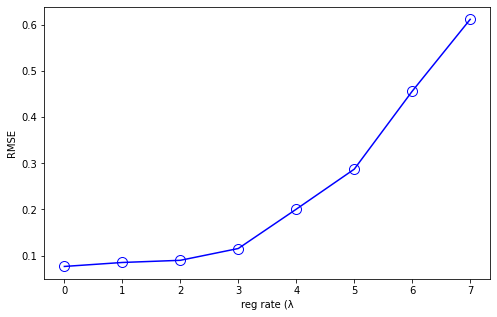

In [10]:
f = plt.figure(figsize=(8,5))

degree=9
training_errors = []
w_dict = {}

for i,c in enumerate([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]):
    poly = PolynomialFeatures(degree)
    X_transform = poly.fit_transform(X.reshape(-1,1))
    lin_reg = Ridge()
    lin_reg.fit(X_transform, y, reg_rate=c)
    
    w_dict[i] = lin_reg.w
    training_errors.append(rmse(lin_reg.predict(X_transform), y))
    
plot_model_selection(training_errors)

**The most appropriate value of λ results in lowest validation error.**<br>
**Most appropriate value of λ from above ﬁgure is 0.0001.**

# **Gradient Descent**

**In Process**